In [ ]:
#installing the transformers
!pip install transformers[torch]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 5.1 MB/s 
     |████████████████████████████████| 182 kB 49.4 MB/s 
     |████████████████████████████████| 7.6 MB 28.7 MB/s 


In [ ]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

In [ ]:
from PIL import Image
from IPython.display import display


In [ ]:
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-large-handwritten") 

Downloading:   0%|          | 0.00/228 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Downloading:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

In [ ]:
#pretrained microsoft ocr model trained with handwritten IAM dataset
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-large-handwritten")

Downloading:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.23G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# To display the given image
def show_image(pathStr):
  img = Image.open(pathStr).convert("RGB")
  display(img)
  return img



In [ ]:
#predicting the output of the given image
def output_image(src_img):
  pixel_values = processor(images=src_img, return_tensors="pt").pixel_values
  generated_ids = model.generate(pixel_values)
  return processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

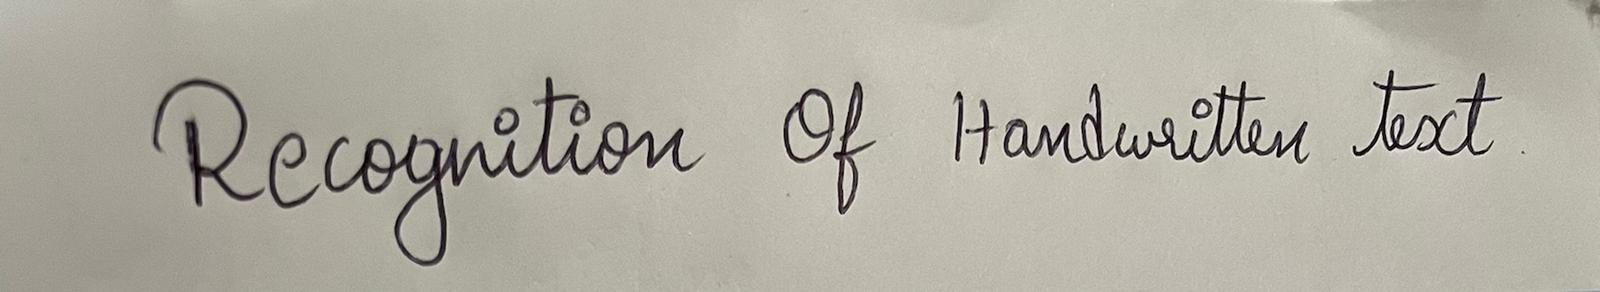

In [ ]:
#Uploaded hand return image
hw_image3 = show_image('/content/handwritten 2.jpeg')

In [ ]:
output_image(hw_image3)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
/usr/local/lib/python3.8/dist-packages/transformers/generation/utils.py:1387: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 20 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


'Recognition of handwritten text.'

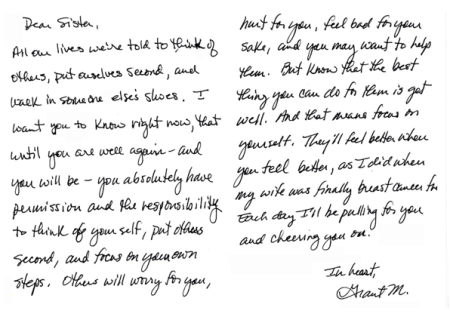

In [ ]:
#To display the image
hw_image = show_image('/content/image1.png')

In [ ]:
output_image(hw_image)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


'0 0'

In [ ]:
hw_image1 = hw_image.crop((0, 10, hw_image.size[0], 40))
display(hw_image1)


In [ ]:
output_image(hw_image1)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


'Dean Sister, but her you, feel bad for years,'

In [ ]:
hw_image2 = hw_image.crop((0, 40, hw_image.size[0], 60))
display(hw_image2)

In [ ]:
output_image(hw_image2)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


'All our lives were told to thinking. Sake, and you may want to help'

In [ ]:
#pretarined model which is trained with printed dataset
printed_processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-printed')
printed_model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-printed')

def ocr_printed_image(src_img):
  pixel_values = printed_processor(images=src_img, return_tensors="pt").pixel_values
  generated_ids = printed_model.generate(pixel_values)
  return printed_processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


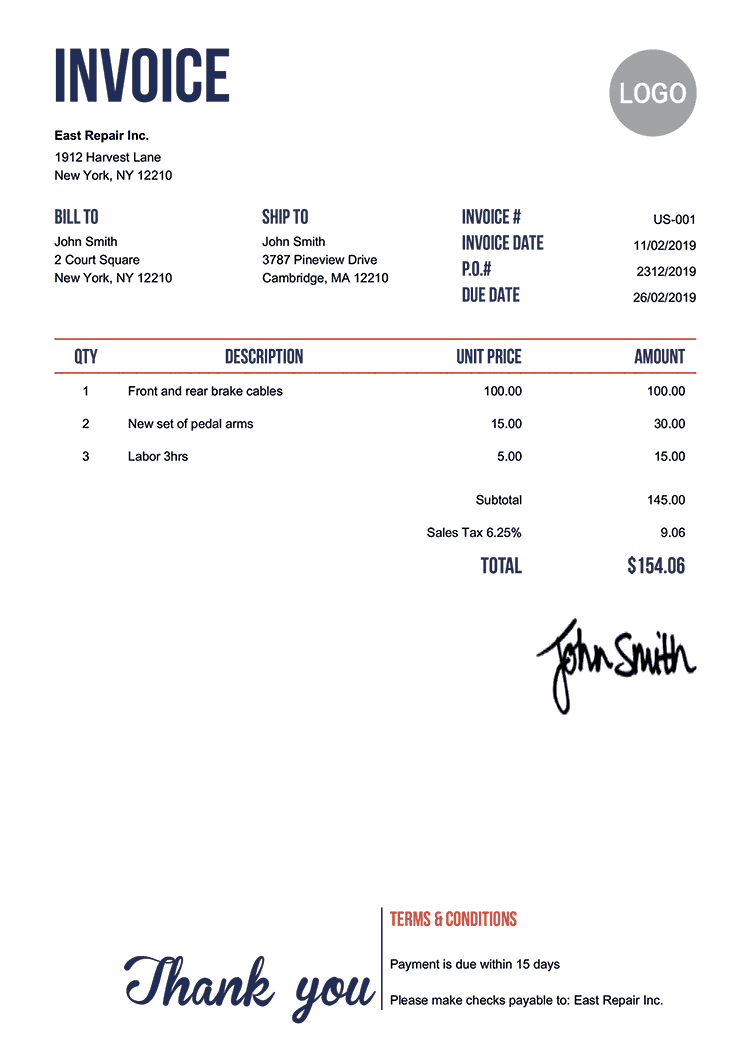

In [ ]:
invoice_image = show_image('/content/image2.png')

In [ ]:
invoice_image1 = invoice_image.crop((0, 200, invoice_image.size[0], 225))
display(invoice_image1)

In [ ]:
ocr_printed_image(invoice_image1)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


'BILL BY SHPT NOICE: USH'

In [ ]:
invoice_image2 = invoice_image.crop((0, 230, invoice_image.size[0], 250))
display(invoice_image2)

In [ ]:
ocr_printed_image(invoice_image2)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


'JOH SHIM NO. JOH SHIMH INVOICE DATE 102909'